In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('titles.csv')
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts21930,Lupin the Third,SHOW,Arsene Lupin III is the grandson of the master...,1971,TV-14,23,"['scifi', 'animation', 'action', 'comedy', 'cr...",['JP'],6.0,tt0159175,7.9,2116.0,45.829,8.0
1,ts25177,Mobile Suit Gundam,SHOW,Mobile Suit Gundam is a televised anime series...,1979,TV-Y7,25,"['scifi', 'war', 'animation', 'action', 'drama...",['JP'],1.0,tt0159172,7.9,2281.0,41.250,8.1
2,ts35087,Galaxy Express 999,SHOW,Galaxy Express 999 is a manga written and draw...,1978,TV-PG,24,"['scifi', 'action', 'drama', 'animation']",['JP'],1.0,tt0185066,7.8,459.0,5.064,8.3
3,ts82387,Lupin the 3rd,SHOW,The master thief Lupin III and his cronies con...,1977,TV-14,24,"['scifi', 'animation', 'action', 'comedy', 'cr...",['JP'],4.0,tt0159192,8.0,1738.0,0.600,NaN
4,ts2846,Chōdenji Machine Voltes V,SHOW,Chōdenji Machine Voltes V is a Japanese anime ...,1977,TV-PG,24,"['drama', 'action', 'scifi', 'animation']",['JP'],1.0,tt0159855,8.1,207.0,12.625,7.3


In [20]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,1081.000000,1081.000000,1080.000000,907.000000,907.000000,1068.000000,1006.000000
mean,2013.367253,21.548566,1.725926,6.830650,3796.401323,21.686957,7.149702
std,8.339731,11.474517,2.345282,1.012411,19513.703283,50.583960,1.440071
min,1967.000000,0.000000,1.000000,1.400000,5.000000,0.000120,1.000000
25%,2011.000000,23.000000,1.000000,6.300000,69.500000,4.479750,6.400000
50%,2016.000000,23.000000,1.000000,6.900000,268.000000,10.501500,7.400000
75%,2018.000000,24.000000,2.000000,7.500000,1174.500000,22.821250,8.200000
max,2022.000000,208.000000,51.000000,9.100000,325381.000000,1199.380000,10.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1081 non-null   object 
 1   title                 1081 non-null   object 
 2   type                  1081 non-null   object 
 3   description           1050 non-null   object 
 4   release_year          1081 non-null   int64  
 5   age_certification     750 non-null    object 
 6   runtime               1081 non-null   int64  
 7   genres                1081 non-null   object 
 8   production_countries  1081 non-null   object 
 9   seasons               1080 non-null   float64
 10  imdb_id               927 non-null    object 
 11  imdb_score            907 non-null    float64
 12  imdb_votes            907 non-null    float64
 13  tmdb_popularity       1068 non-null   float64
 14  tmdb_score            1006 non-null   float64
dtypes: float64(5), int64(

In [14]:
df[df['title'].str.contains('Rent')]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
776,ts82024,We Rent Tsukumogami,SHOW,"The series is set during the Edo period, in th...",2018,TV-14,25,"['scifi', 'fantasy', 'animation']",['JP'],1.0,tt8574388,6.9,27.0,5.161,9.0
862,ts231077,Rent-a-Girlfriend,SHOW,"After being dumped by his girlfriend, a colleg...",2020,TV-14,24,"['animation', 'comedy', 'romance']",[],2.0,tt11448214,7.3,4831.0,NaN,NaN


In [22]:
ts = df.groupby(by='title')['imdb_score'].sum().sort_values(ascending=False)
ts.head(15)

title
Fullmetal Alchemist: Brotherhood    9.1
Attack on Titan                     9.0
DEATH NOTE                          9.0
Hunter x Hunter                     9.0
SPY x FAMILY                        9.0
Cowboy Bebop                        8.9
One Piece                           8.8
Fighting Spirit                     8.8
Poyopoyo                            8.8
Steins;Gate                         8.8
Haikyu!!                            8.8
Dragon Ball Z                       8.8
Gintama                             8.7
One-Punch Man                       8.7
Ranking of Kings                    8.7
Name: imdb_score, dtype: float64

In [26]:
ts = ts.reset_index()

In [27]:
ts

,title,imdb_score
0,Fullmetal Alchemist: Brotherhood,9.1
1,Attack on Titan,9.0
2,DEATH NOTE,9.0
3,Hunter x Hunter,9.0
4,SPY x FAMILY,9.0
...,...,...
1076,Giant Gorg,0.0
1077,"Boku no Imouto wa ""Osaka Okan""",0.0
1078,Our Last Crusade or the Rise of a New World,0.0
1079,Bludgeoning Angel Dokuro-Chan,0.0


In [30]:
import matplotlib.pyplot as plt

In [36]:
top_10 = ts.head(10)

<Axes: xlabel='title', ylabel='imdb_score'>

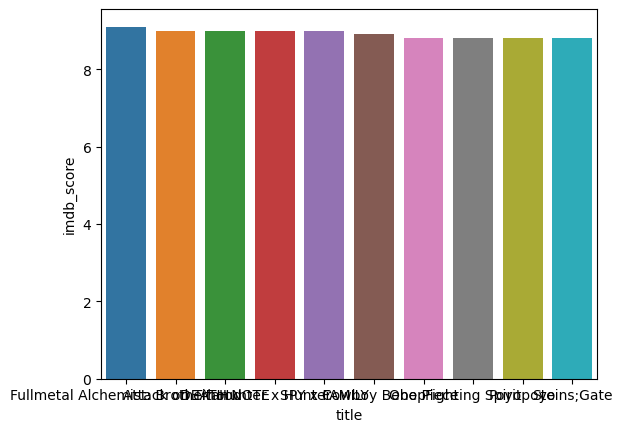

In [37]:
sns.barplot(top_10, x='title', y='imdb_score')

In [ ]:
image.png